In [1]:
%reload_ext autoreload
%autoreload 2

In [52]:
import pandas as pd
import similarity

backend_cards = similarity.make(package="backend:backends", key="cards", use_cache=False)
default_backend = similarity.make(package="backend:backends", key="default_backend", use_cache=False)

metric_cards = similarity.make(package="metric", key="cards", use_cache=False)
metric_names = list(metric_cards.keys())

for name in metric_names:
    if name not in default_backend:
        default_backend[name] = "No implementation"

# metric_names = list(default_backend.keys())
# metric_names = similarity.make(package="backend:backends", key="metric_names", use_cache=False)

backend_metrics = {}
for k, backend in backend_cards.items():
    backend_metrics[k] = {}
    for metric in metric_names:
        if k == default_backend[metric]:
            backend_metrics[k][metric] = 2
        elif metric in backend["metrics"]:
            backend_metrics[k][metric] = 1.5
        else:
            backend_metrics[k][metric] = 0

# backend_metrics = {
#     k: [metric in backend["metrics"] for metric in all_metrics]
#     for k, backend in backend_cards.items()
# }

backend_df = pd.DataFrame.from_dict(backend_metrics, orient="index", columns=metric_names)
# print(backend_df)

In [53]:
# TODO: default backend
default_backend_df = pd.DataFrame.from_dict(default_backend, orient="index", columns=["default_backend"])
# print(default_backend_df)

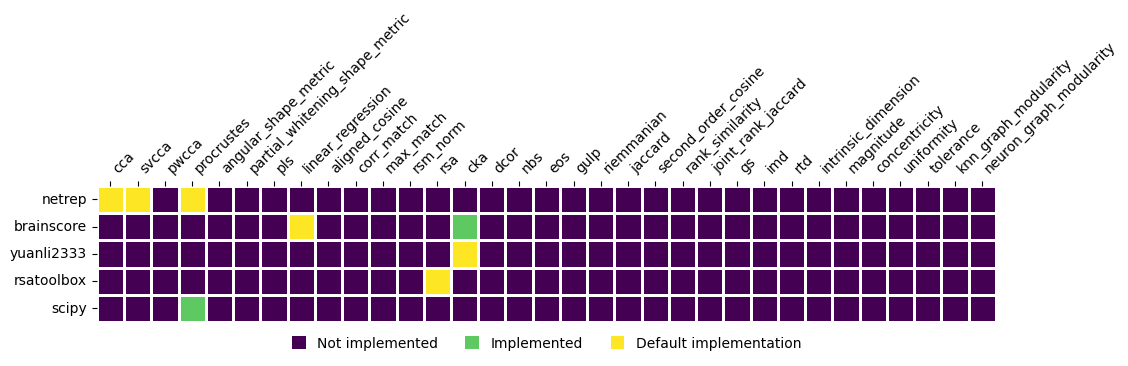

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(5+0.2*len(metric_names), 1+0.2*len(backend_cards)), dpi=100)
ax = sns.heatmap(backend_df, annot=False, cmap="viridis", cbar=False, linewidths=1, linecolor='white')
# plt.ylabel("Backends")
# plt.xlabel("Metrics")
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top') 
# plt.tick_params(length=0)  # Removing the small tick bars
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0, va='center')
plt.axis('scaled')
# plt.show()

# Adding a categorical legend
import numpy as np
from matplotlib.patches import Patch
cmap = sns.color_palette("viridis", as_cmap=True)
normalized_values = backend_df.values / backend_df.values.max()  # Normalize the values to the range [0, 1]
unique_values = np.unique(normalized_values)  # Unique normalized values

# Getting the corresponding colors from the colormap
legend_colors = [cmap(value) for value in unique_values]

# Creating legend elements with the correct colors
labels = ['Not implemented', 'Implemented', 'Default implementation']
legend_elements = [
    Patch(facecolor=legend_colors[i], label=labels[i])
    for i in range(len(unique_values))
]
# Display the legend
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3,
    handlelength=1, handleheight=1, frameon=False)

# TODO: make figure in github action on push
# TODO: figures for dark and light modes (transparent=True)
plt.savefig("../figures/backend_metrics.png", transparent=True, bbox_inches='tight', dpi=300)

In [46]:
backend_metrics = similarity.make(package="backend:backends", key="metric_by_backend", use_cache=False)
print(backend_metrics)

backend_by_metric = similarity.make(package="backend:backends", key="backend_by_metric", use_cache=False)
print(backend_by_metric)

{'netrep': ['procrustes', 'cca', 'svcca', 'cka'], 'brainscore': ['pls', 'cka', 'rsa'], 'yuanli2333': ['cka'], 'rsatoolbox': ['rsa']}
{'procrustes': ['netrep'], 'cca': ['netrep'], 'svcca': ['netrep'], 'cka': ['netrep', 'brainscore', 'yuanli2333'], 'rsa': ['brainscore', 'rsatoolbox'], 'pls': ['brainscore']}
